In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
!pip install category_encoders

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 761.9 kB/s eta 0:00:00


In [2]:
a=pd.read_csv('Company_data.csv')
a

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,15.70,175,194,10,69,128,Good,26,17,Yes,No
1,5.46,188,34,0,199,97,Bad,56,16,No,No
2,11.00,200,89,14,426,79,Good,29,13,Yes,Yes
3,12.94,180,143,18,310,87,Medium,76,14,No,No
4,15.71,142,167,1,397,53,Good,39,15,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
395,16.15,224,134,20,261,87,Bad,72,17,Yes,Yes
396,5.07,267,51,18,450,84,Bad,24,18,Yes,No
397,15.36,291,181,18,372,143,Good,57,11,Yes,Yes
398,6.78,120,33,17,442,112,Bad,36,12,No,No


In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
a.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,10.120425,170.470000,110.435000,10.15000,275.812500,124.485000,49.600000,14.012500
std,5.781774,70.796713,52.954047,5.96754,130.746756,44.202255,17.796116,2.552181
min,0.050000,50.000000,21.000000,0.00000,50.000000,50.000000,20.000000,10.000000
25%,5.050000,111.750000,60.750000,5.00000,167.750000,87.000000,34.000000,12.000000
50%,10.355000,166.500000,111.000000,10.00000,274.000000,122.000000,50.000000,14.000000
75%,15.322500,230.250000,159.000000,15.00000,391.000000,164.000000,65.000000,16.000000
max,19.970000,300.000000,200.000000,20.00000,500.000000,200.000000,80.000000,18.000000


In [5]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['ShelveLoc','Urban', 'US'])
sales1=encoder.fit_transform(a)

In [6]:
sales_val = []
for value in a["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
sales1["sales_val"]= sales_val

In [7]:
sales1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,15.70,175,194,10,69,128,1,26,17,1,1,high
1,5.46,188,34,0,199,97,2,56,16,2,1,low
2,11.00,200,89,14,426,79,1,29,13,1,2,high
3,12.94,180,143,18,310,87,3,76,14,2,1,high
4,15.71,142,167,1,397,53,1,39,15,2,2,high
...,...,...,...,...,...,...,...,...,...,...,...,...
395,16.15,224,134,20,261,87,2,72,17,1,2,high
396,5.07,267,51,18,450,84,2,24,18,1,1,low
397,15.36,291,181,18,372,143,1,57,11,1,2,high
398,6.78,120,33,17,442,112,2,36,12,2,1,low


In [8]:
x=sales1.drop(['sales_val','Sales'],axis=1)
y=sales1['sales_val']

In [9]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,175,194,10,69,128,1,26,17,1,1
1,188,34,0,199,97,2,56,16,2,1
2,200,89,14,426,79,1,29,13,1,2
3,180,143,18,310,87,3,76,14,2,1
4,142,167,1,397,53,1,39,15,2,2
...,...,...,...,...,...,...,...,...,...,...
395,224,134,20,261,87,2,72,17,1,2
396,267,51,18,450,84,2,24,18,1,1
397,291,181,18,372,143,1,57,11,1,2
398,120,33,17,442,112,2,36,12,2,1


In [10]:
y

0      high
1       low
2      high
3      high
4      high
       ... 
395    high
396     low
397    high
398     low
399    high
Name: sales_val, Length: 400, dtype: object

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

## building decision tree classifier using entropy criteria

In [12]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [13]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

high    73
low     47
Name: count, dtype: int64

In [14]:
preds

array(['low', 'high', 'high', 'low', 'low', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'high', 'low', 'low', 'low', 'high', 'low',
       'high', 'high', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low', 'high',
       'high', 'high', 'low', 'high', 'low', 'high', 'low', 'high',
       'high', 'low', 'high', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'high', 'high', 'high', 'high',
       'high', 'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'high', 'high', 'high', 'high', 'high',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'high', 'high', 'high',
    

In [15]:
pd.crosstab(y_test,preds)

col_0,high,low
sales_val,,
high,44,32
low,29,15


## ACCURACY

In [16]:

np.mean(preds==y_test)

0.49166666666666664

In [17]:
(34+47)/(34+18+21+47)

0.675

In [18]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        high       0.58      0.60      0.59        73
         low       0.34      0.32      0.33        47

    accuracy                           0.49       120
   macro avg       0.46      0.46      0.46       120
weighted avg       0.49      0.49      0.49       120



Text(0.5, 1.0, 'Decision tree using Entropy')

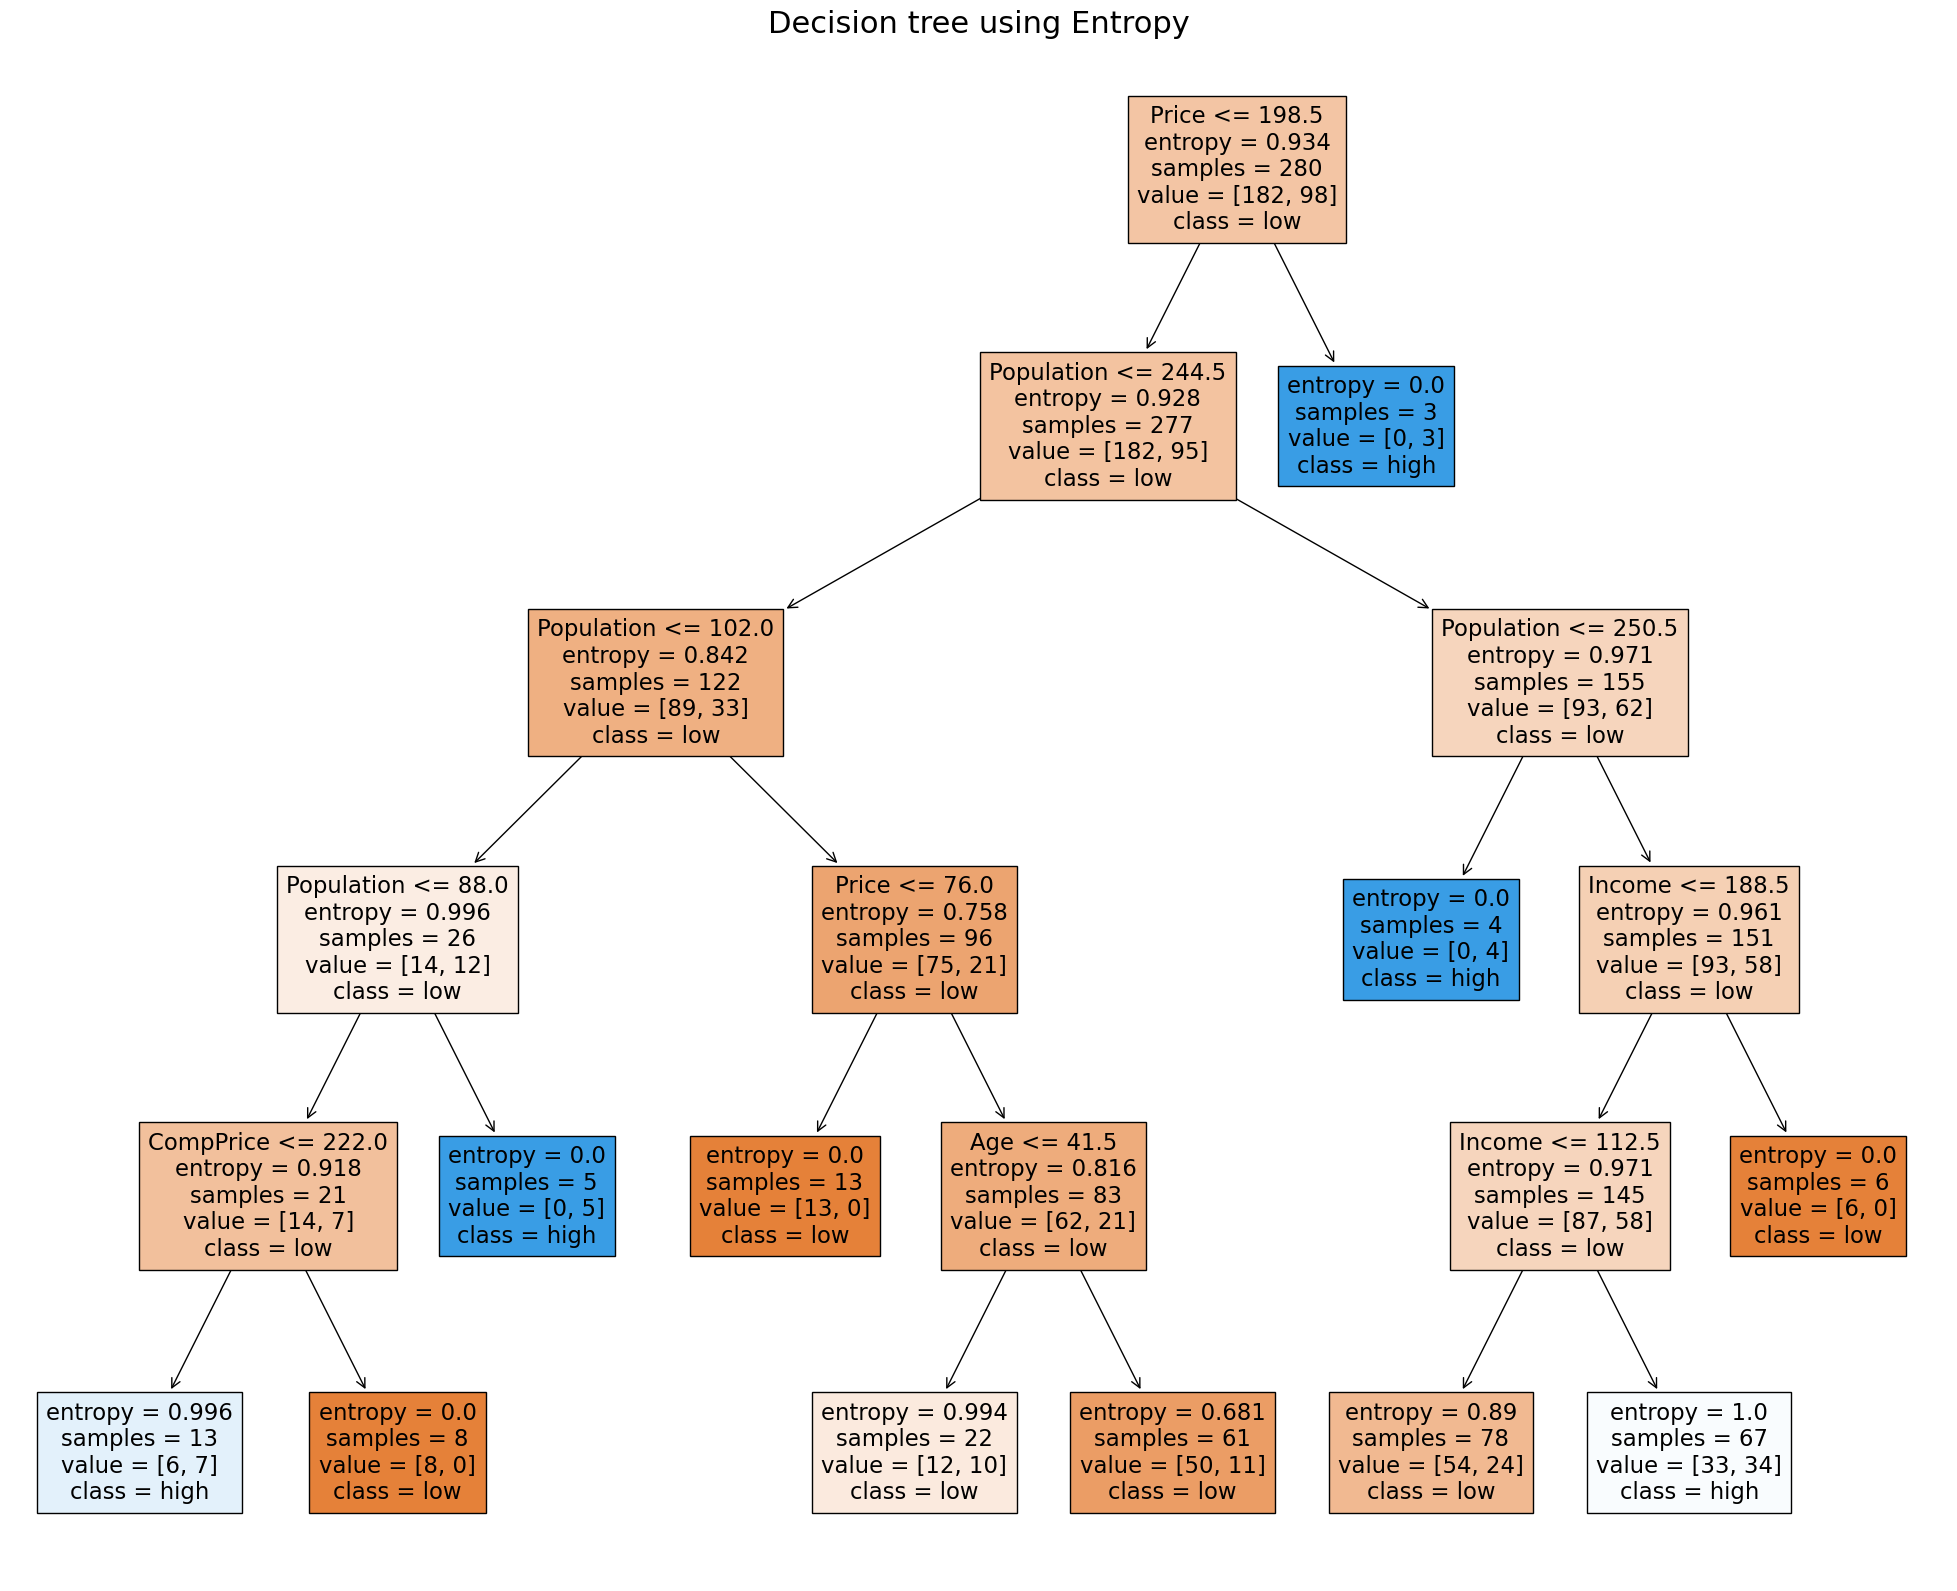

In [19]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

## Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [21]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.49166666666666664

Text(0.5, 1.0, 'Decision tree using Entropy')

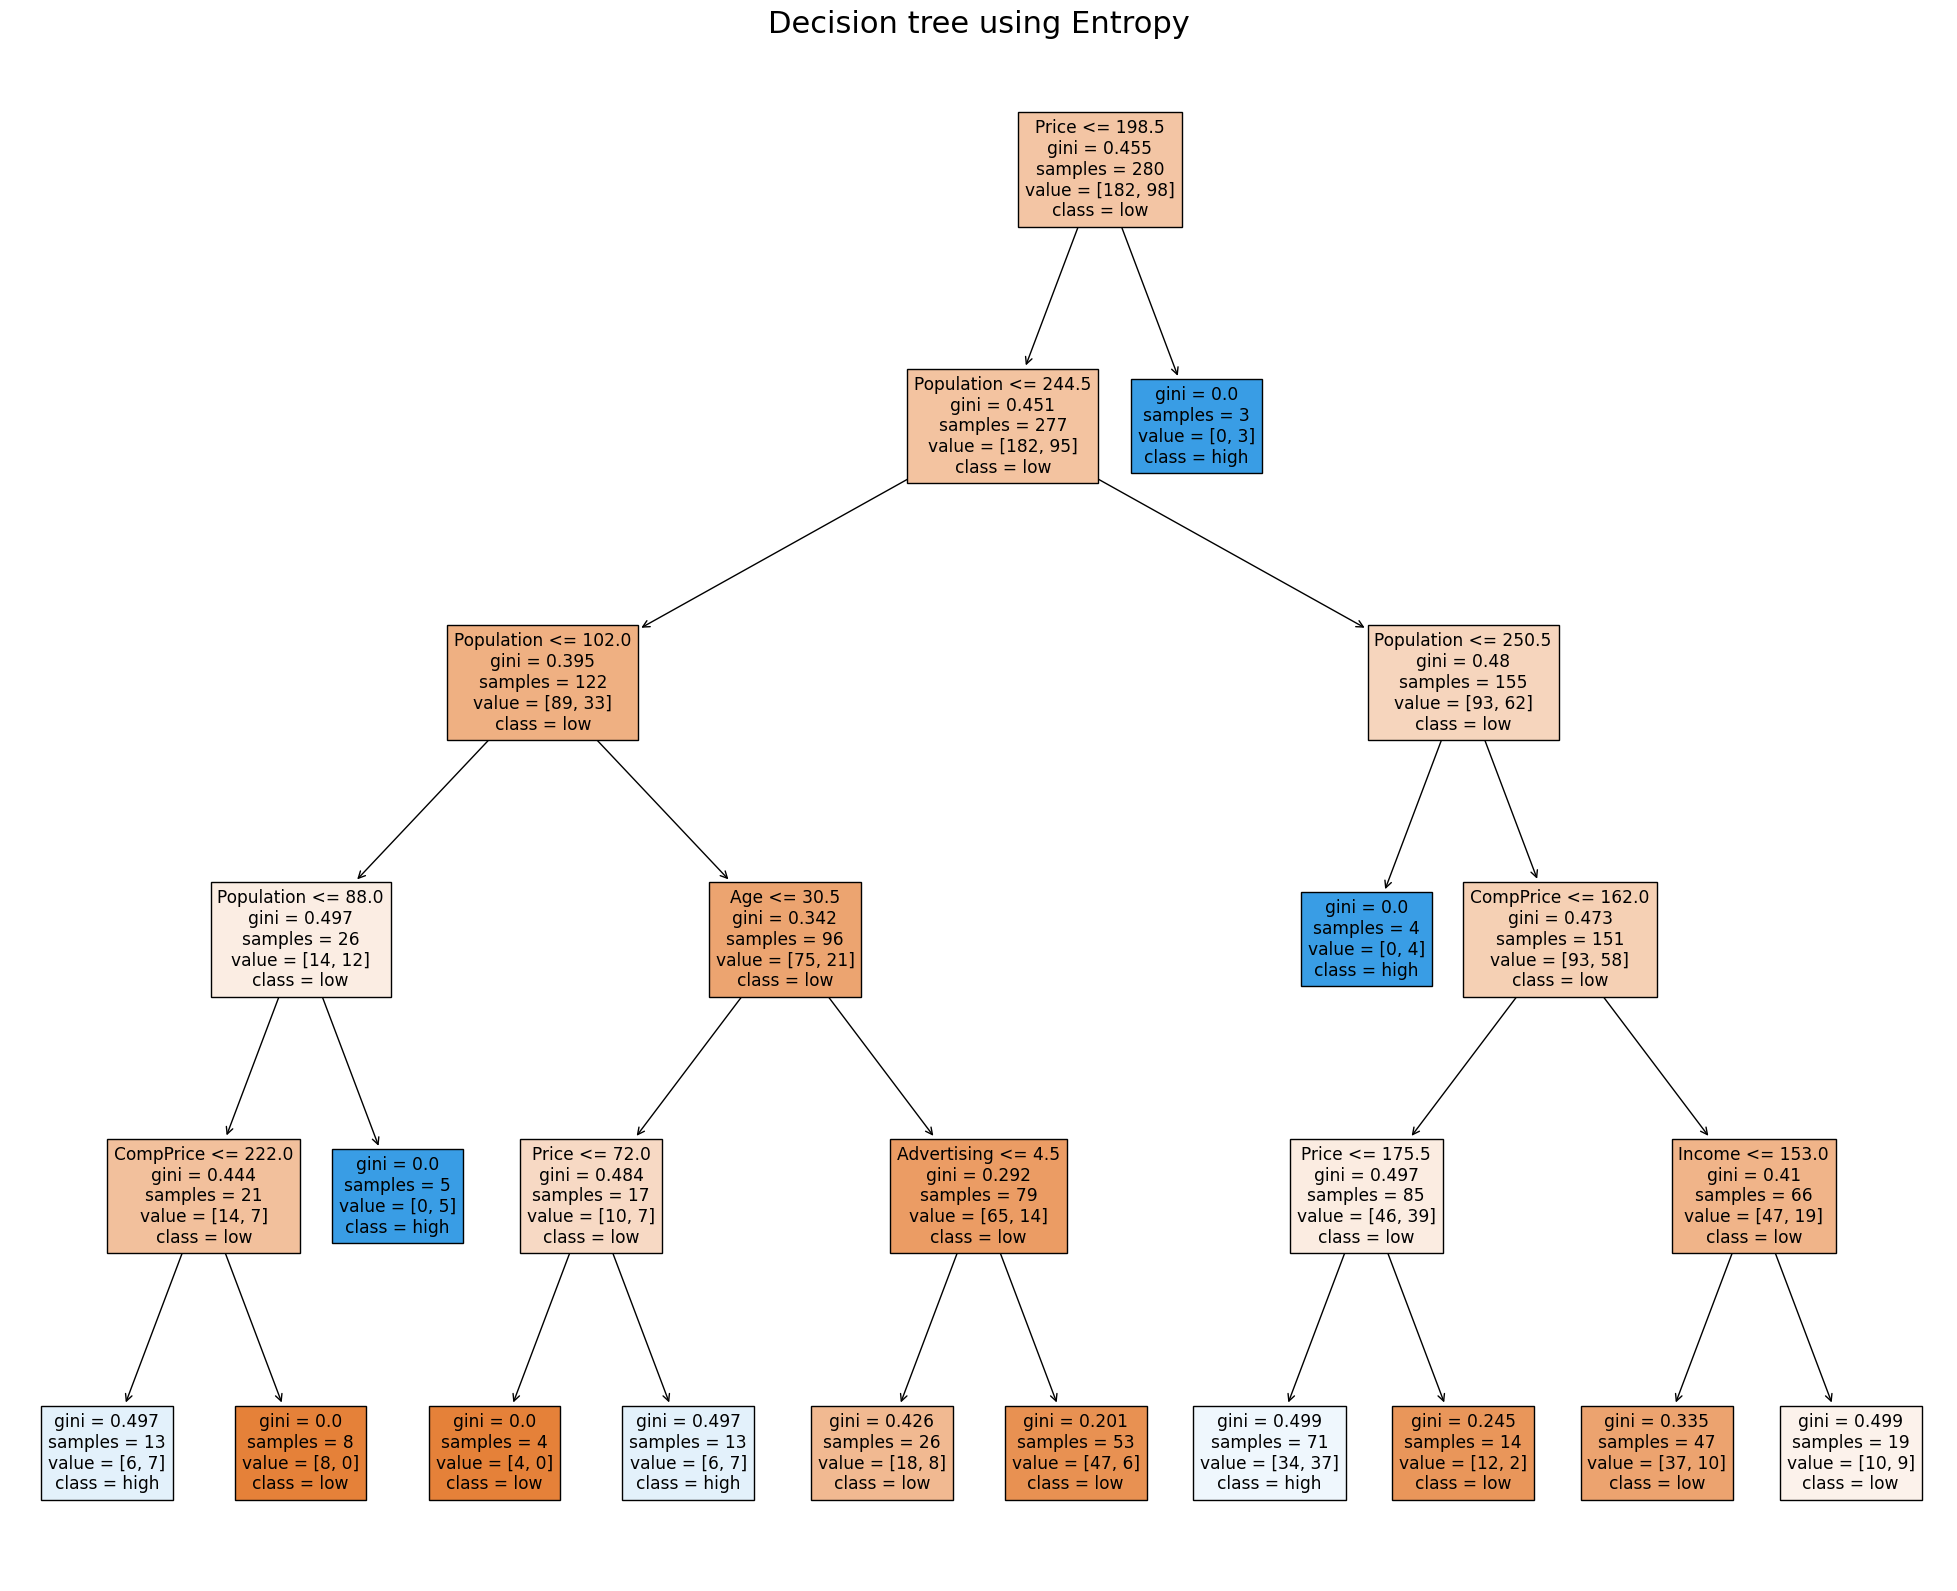

In [23]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)